### Check Conversion

In this Notebook we will do a basic data quality check of the conversion, we will also see the immense difference in speed and data accessibility between geodatabases(standard geospatial datastructures)

The ability to subset specifically what we are looking for, and where we are looking for it without having to download a whole zip file and then open a larger vector dataset.

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import numpy as np
import random
import fiona
from shapely.geometry import box, Point
import xarray as xr

In [25]:
vector_file ='../data/extracted_files_spat/EMODnet_HA_Energy_WindFarms_20240508.gdb'

layer = 1

zarr_file = '../data/converted_zarr_files_spat/geodatabase_to_zarr_finalzarr/EMODnet_HA_Energy_WindFarms_pg_20240508_EMODnet_HA_Energy_WindFarms_20240508.zarr'

['Sweden' 'United Kingdom' 'Denmark' 'Latvia' 'Netherlands' 'France'
 'Ireland' 'Belgium' 'Spain' 'Germany' 'Finland' 'Poland' 'Estonia'
 'Portugal' 'Lithuania']


/tmp/ipykernel_36215/3385812468.py:16: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf.plot(ax=ax, column='COUNTRY', color='red', markersize=1, alpha=0.5)


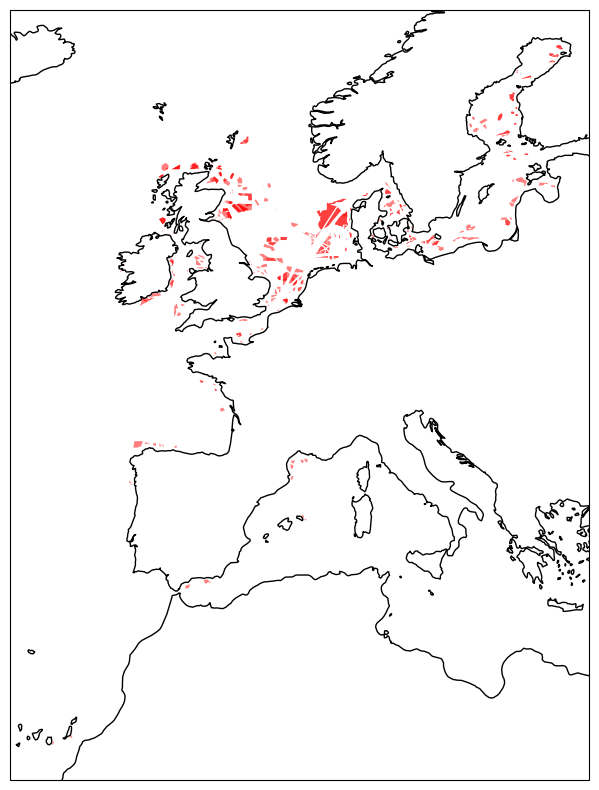

In [26]:

import geopandas as gpd
layers = fiona.listlayers(vector_file)
layer = layers[1]

gdf = gpd.read_file(vector_file, layer=layer)

country = gdf['COUNTRY']
print(country.unique())
# Plot the data
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Plot the data
gdf.plot(ax=ax, column='COUNTRY', color='red', markersize=1, alpha=0.5)
plt.show()

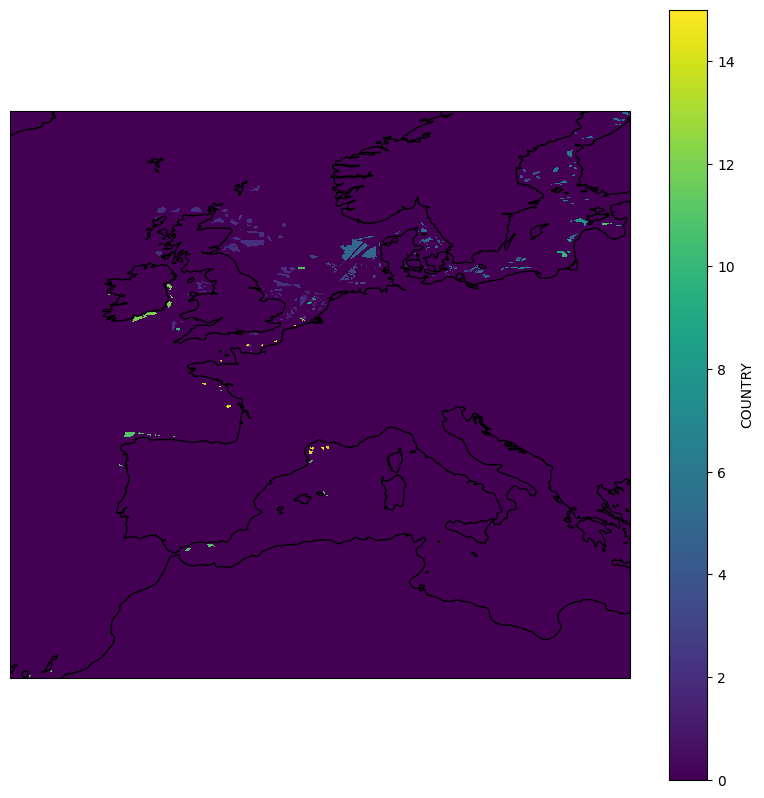

In [4]:
ds_gdb2zarr = xr.open_dataset(zarr_file, engine='zarr')
# Plot the wind farms
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
dsplot = ds_gdb2zarr['COUNTRY'].plot()

plt.show()

In [23]:
gdb = '../data/extracted_files_spat/EMODnet_GEO_Seabed_Substrate_All_Res/EMODnet_Seabed_Substrate_1M.gdb'

layers = fiona.listlayers(gdb)
layer = layers[0]
gdf = gpd.read_file(gdb, driver='FileGDB', layer=layer)

# get geometries in between 20 and 50 latitude and 10 and 40 longitude
gdf_filtered = gdf.cx[0:40, 20:50]
# Plot the geodatabase data
fig, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
gdf_filtered.plot(column='Folk_5cl', ax=ax, legend=True)
ax.set_title('Geodatabase')

plt.show()

DriverError: Failed to open dataset (flags=68): ../data/extracted_files_spat/EMODnet_GEO_Seabed_Substrate_All_Res/EMODnet_Seabed_Substrate_1M.gdb

In [13]:
ds = xr.open_dataset('../data/converted_zarr_files_spat/geodatabase_to_zarr_finalzarr/Seabed_substrate_1M_Sep2023_EMODnet_Seabed_Substrate_1M.zarr', engine='zarr')
ds['Folk_5cl_txt']

ds

<xarray.Dataset> Size: 928MB
Dimensions:       (latitude: 7395, longitude: 15675)
Coordinates:
  * latitude      (latitude) float64 59kB 81.85 81.84 81.83 ... 7.913 7.903
  * longitude     (longitude) float64 125kB -88.74 -88.73 -88.72 ... 67.99 68.0
Data variables:
    Folk_5cl      (latitude, longitude) float32 464MB ...
    Folk_5cl_txt  (latitude, longitude) float32 464MB ...
Attributes:
    Conventions:           CF-1.8
    History:               Zarr dataset converted from EMODnet_Seabed_Substra...
    categorical_encoding:  {}
    geographical_extent:   [-88.73715209999995, 7.902816615000063, 68.0039709...
    proj:epsg:             4326
    title:                 EMODnet_Seabed_Substrate_1M

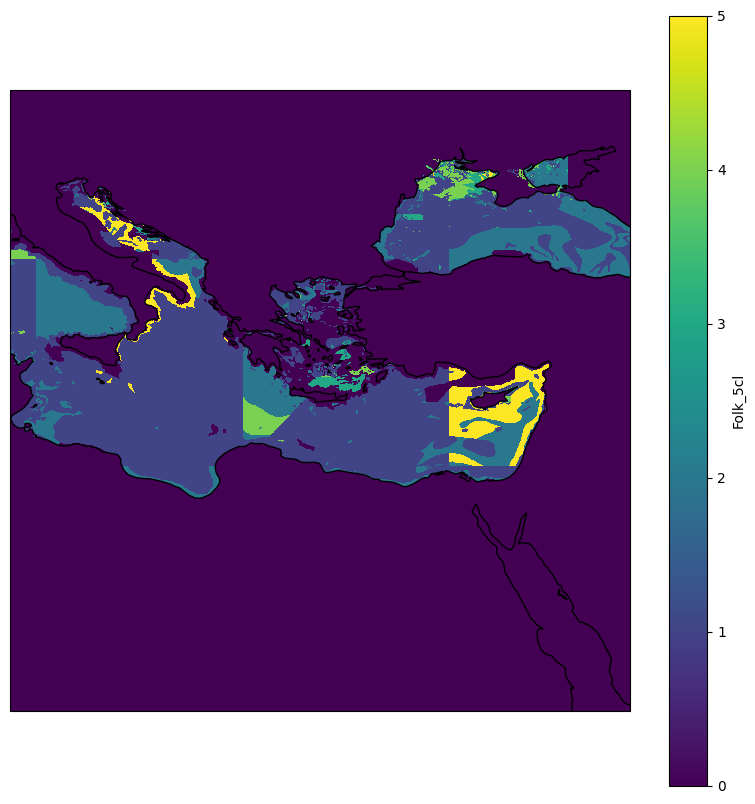

In [15]:


# Plot the wind farms
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
dsplot = ds['Folk_5cl'].sel(latitude=slice(50,20), longitude=slice(10,40)).plot()
plt.show()